In [1]:
#matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data (w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.7637, -1.2375]) 
label: tensor([4.8940])


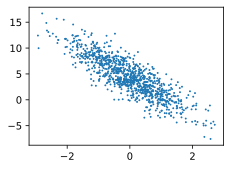

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)


In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1239,  0.1682],
        [-0.0133, -1.0713],
        [-1.6485, -0.7150],
        [ 0.4066,  0.0510],
        [ 1.7421,  1.5930],
        [ 0.2817,  0.6049],
        [ 1.5866,  0.7041],
        [ 0.6601, -0.6185],
        [ 1.2103, -0.0961],
        [ 0.1075,  0.9087]]) 
 tensor([[3.8751],
        [7.8137],
        [3.3456],
        [4.8393],
        [2.2684],
        [2.7003],
        [4.9803],
        [7.6051],
        [6.9582],
        [1.3341]])
